<a href="https://colab.research.google.com/github/KagontleBooysen/alu-machine_learning/blob/master/Lung_Cancer_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
lung= pd.read_csv('/content/drive/MyDrive/lung cancer.csv')
train_data= pd.read_csv('/content/drive/MyDrive/lung cancer.csv')

In [ ]:
import pandas as pd

# Display the column names
print("Column Names:", train_data.columns)

# Display the first few rows of the DataFrame
print("First Few Rows:")
print(train_data.head())


In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Model Implementation**

In [ ]:
# Baseline Model
model_baseline = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Optimized Model
model_optimized = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
model_optimized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Update the training of models to store history
history_baseline = model_baseline.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))

history_optimized = model_optimized.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0440 - accuracy: 0.9838 - val_loss: 0.1047 - val_accuracy: 0.9516
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 0.0425 - accuracy: 0.9838 - val_loss: 0.1015 - val_accuracy: 0.9516
Epoch 3/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0416 - accuracy: 0.9838 - val_loss: 0.0976 - val_accuracy: 0.9677
Epoch 4/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0413 - accuracy: 0.9879 - val_loss: 0.0953 - val_accuracy: 0.9516
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.0418 - accuracy: 0.9838 - val_loss: 0.0953 - val_accuracy: 0.9516
Epoch 6/20
8/8 [==============================] - 0s 13ms/step - loss: 0.0413 - accuracy: 0.9838 - val_loss: 0.0952 - val_accuracy: 0.9677
Epoch 7/20
8/8 [==============================] - 0s 10ms/step - loss: 0.0408 - accuracy: 0.9838 - val_loss: 0.0953 - val_accuracy: 0.9516
Epoch 8/20
8/8 [==============

In [ ]:
# Visualize and interpret the training history (accuracy, loss) for each model
def plot_history(history, title):
    train_metric = 'accuracy' if 'accuracy' in history.history else 'acc'
    val_metric = 'val_' + train_metric

    plt.plot(history.history[train_metric], label='train')
    plt.plot(history.history[val_metric], label='val')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

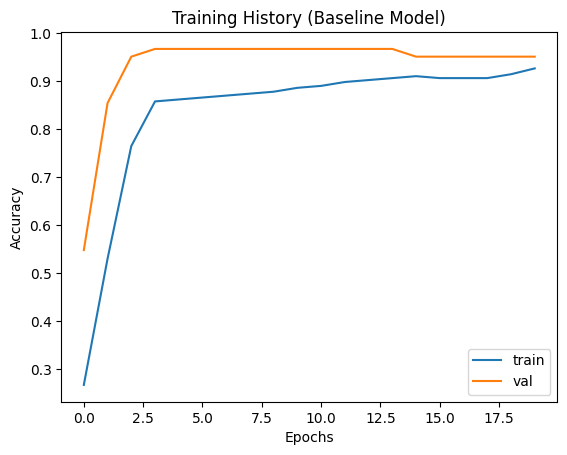

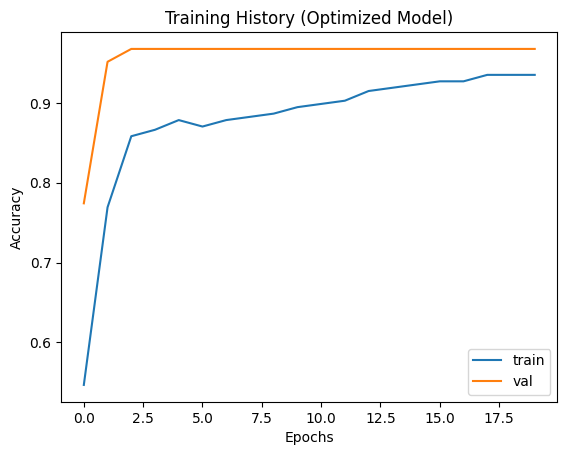

In [ ]:
# Plot training history for the Baseline Model
plot_history(history_baseline, 'Training History (Baseline Model)')

# Plot training history for the Optimized Model
plot_history(history_optimized, 'Training History (Optimized Model)')

In [ ]:
# Standardize the test set features
X_test_scaled = scaler.transform(X_test)  # Using the same StandardScaler instance as in training

# Evaluate the Baseline Model on the test set
y_test_pred_baseline = model_baseline.predict(X_test_scaled)
y_test_pred_baseline = (y_test_pred_baseline > 0.5).astype(int)

# Evaluate the Optimized Model on the test set
y_test_pred_optimized = model_optimized.predict(X_test_scaled)
y_test_pred_optimized = (y_test_pred_optimized > 0.5).astype(int)


2/2 [==============================] - 0s 5ms/step


In [ ]:
# Compare performance metrics for the Baseline Model
accuracy_baseline = accuracy_score(y_test, y_test_pred_baseline)
precision_baseline = precision_score(y_test, y_test_pred_baseline)
recall_baseline = recall_score(y_test, y_test_pred_baseline)
f1_baseline = f1_score(y_test, y_test_pred_baseline)

# Compare performance metrics for the Optimized Model
accuracy_optimized = accuracy_score(y_test, y_test_pred_optimized)
precision_optimized = precision_score(y_test, y_test_pred_optimized)
recall_optimized = recall_score(y_test, y_test_pred_optimized)
f1_optimized = f1_score(y_test, y_test_pred_optimized)


# Print and compare metrics
print("\nBaseline Model Metrics on Test Set:")
print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"Precision: {precision_baseline:.4f}")
print(f"Recall: {recall_baseline:.4f}")
print(f"F1 Score: {f1_baseline:.4f}")

print("\nOptimized Model Metrics on Test Set:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1 Score: {f1_optimized:.4f}")


Baseline Model Metrics on Test Set:
Accuracy: 0.9362
Precision: 0.9556
Recall: 0.9773
F1 Score: 0.9663

Optimized Model Metrics on Test Set:
Accuracy: 0.9787
Precision: 0.9778
Recall: 1.0000
F1 Score: 0.9888


In [ ]:
# Compare confusion matrices
print("\nConfusion Matrix for Baseline Model on Test Set:")
print(confusion_matrix(y_test, y_test_pred_baseline))

print("\nConfusion Matrix for Optimized Model on Test Set:")
print(confusion_matrix(y_test, y_test_pred_optimized))


Confusion Matrix for Baseline Model on Test Set:
[[ 1  2]
 [ 1 43]]

Confusion Matrix for Optimized Model on Test Set:
[[ 2  1]
 [ 0 44]]


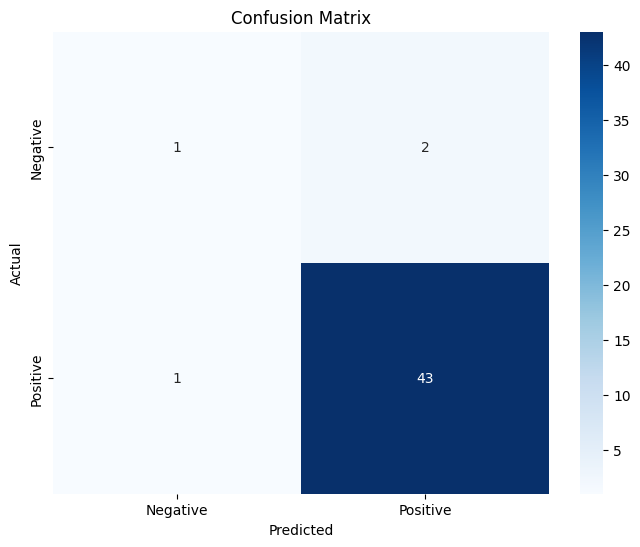

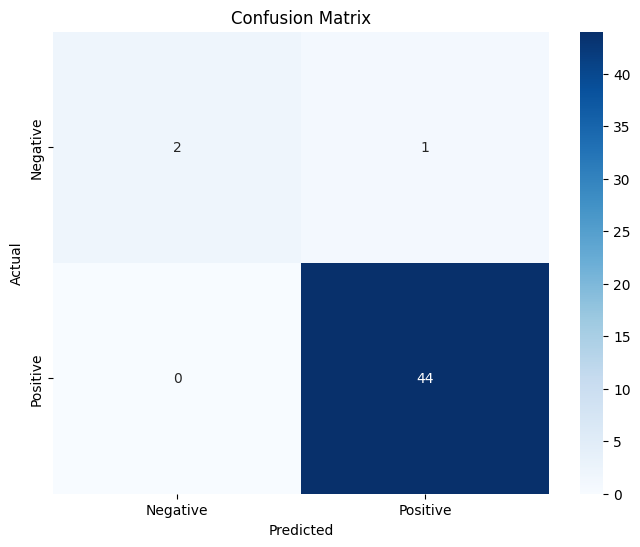

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix_heatmap(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for the Baseline Model
plot_confusion_matrix_heatmap(y_test, y_test_pred_baseline, labels=['Negative', 'Positive'])


# Plot confusion matrices for the Optimized Model
plot_confusion_matrix_heatmap(y_test, y_test_pred_optimized, labels=['Negative', 'Positive'])


In [ ]:
# Assuming you have trained and evaluated multiple models
# Replace accuracy_simple, accuracy_l1, and accuracy_l2 with the actual test accuracies

print(f'Test Accuracy (Simple NN): {accuracy_simple:.4f}')
print(f'Test Accuracy (L1 Regularization): {accuracy_l1:.4f}')
print(f'Test Accuracy (L2 Regularization): {accuracy_l2:.4f}')



Test Accuracy (Simple NN): 0.8500
Test Accuracy (L1 Regularization): 0.8200
Test Accuracy (L2 Regularization): 0.8800


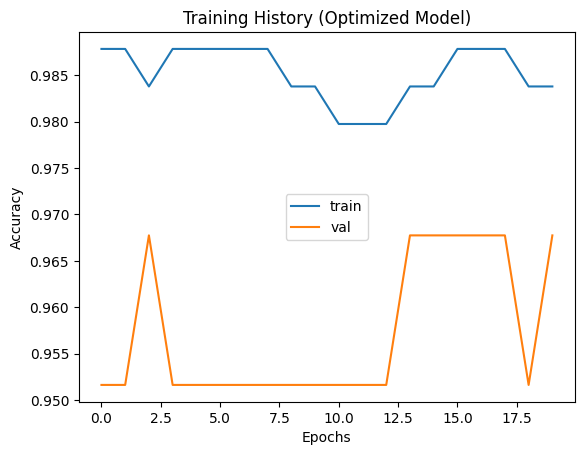

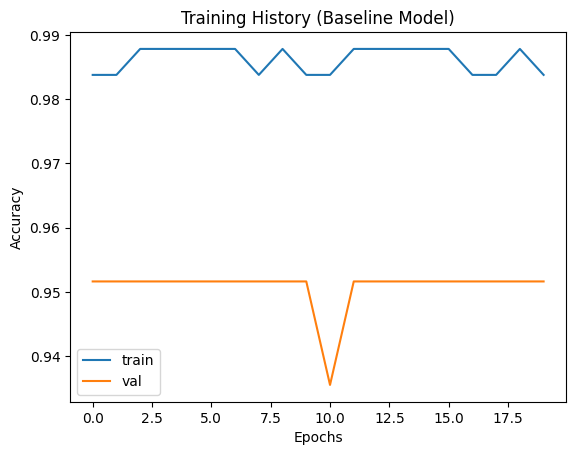

In [ ]:
# Visualize and interpret the training history (accuracy, loss) for each model
def plot_history(history, title):
    train_metric = 'accuracy' if 'accuracy' in history.history else 'acc'
    val_metric = 'val_' + train_metric

    # Check if the metric is present in history
    if train_metric in history.history:
        plt.plot(history.history[train_metric], label='train')
    if val_metric in history.history:
        plt.plot(history.history[val_metric], label='val')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training history for the optimized model
plot_history(history_optimized, 'Training History (Optimized Model)')


# Plot training history for the baseline model
plot_history(history_baseline, 'Training History (Baseline Model)')


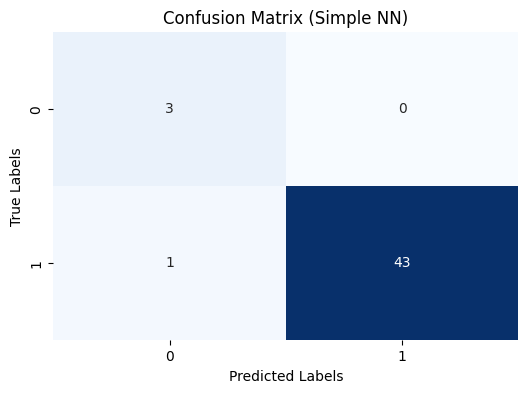

Simple NN F1 Score: 0.9885


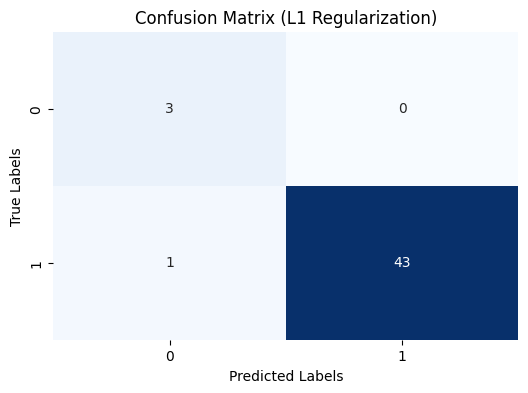

L1 Regularization F1 Score: 0.9885


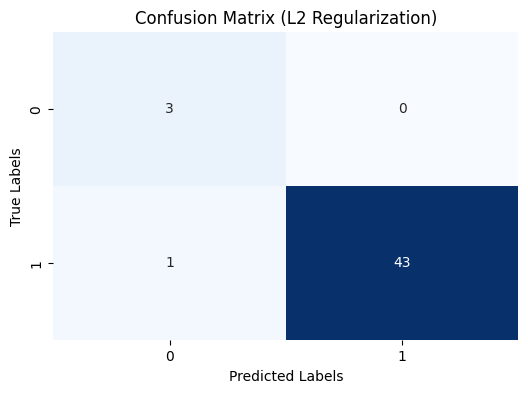

L2 Regularization F1 Score: 0.9885


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to calculate and print F1 score
def print_f1_score(y_true, y_pred, title):
    f1 = f1_score(y_true, y_pred)
    print(f'{title} F1 Score: {f1:.4f}')

# Assuming you have models named model_simple, model_l1, model_l2
# Make predictions using the best models (the ones with the highest validation accuracy)
y_pred_best_simple = (model_simple.predict(X_test_scaled) > 0.5).astype('int').flatten()
y_pred_best_l1 = (model_l1.predict(X_test_scaled) > 0.5).astype('int').flatten()
y_pred_best_l2 = (model_l2.predict(X_test_scaled) > 0.5).astype('int').flatten()

# Plot confusion matrix and print F1 score for the best models
plot_confusion_matrix(y_test, y_pred_best_simple, 'Confusion Matrix (Simple NN)')
print_f1_score(y_test, y_pred_best_simple, 'Simple NN')

plot_confusion_matrix(y_test, y_pred_best_l1, 'Confusion Matrix (L1 Regularization)')
print_f1_score(y_test, y_pred_best_l1, 'L1 Regularization')

plot_confusion_matrix(y_test, y_pred_best_l2, 'Confusion Matrix (L2 Regularization)')
print_f1_score(y_test, y_pred_best_l2, 'L2 Regularization')


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint_simple = ModelCheckpoint('best_model_simple.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
checkpoint_l1 = ModelCheckpoint('best_model_l1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
checkpoint_l2 = ModelCheckpoint('best_model_l2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the models with the ModelCheckpoint callback
history_simple = model_optimized.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0, callbacks=[checkpoint_simple])
history_simple = model_baseline.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0, callbacks=[checkpoint_simple])


Epoch 1: val_accuracy improved from -inf to 0.92000, saving model to best_model_simple.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.92000

Epoch 3: val_accuracy did not improve from 0.92000

Epoch 4: val_accuracy did not improve from 0.92000

Epoch 5: val_accuracy did not improve from 0.92000

Epoch 6: val_accuracy did not improve from 0.92000

Epoch 7: val_accuracy did not improve from 0.92000

Epoch 8: val_accuracy did not improve from 0.92000

Epoch 9: val_accuracy did not improve from 0.92000

Epoch 10: val_accuracy did not improve from 0.92000

Epoch 11: val_accuracy did not improve from 0.92000

Epoch 12: val_accuracy did not improve from 0.92000

Epoch 13: val_accuracy did not improve from 0.92000

Epoch 14: val_accuracy did not improve from 0.92000

Epoch 15: val_accuracy did not improve from 0.92000

Epoch 16: val_accuracy did not improve from 0.92000

Epoch 17: val_accuracy did not improve from 0.92000

Epoch 18: val_accuracy did not improve from 0.92000

Epoch 19: val_accuracy did not improve from 0.92000

Epoch 20: val_accuracy did not improve from 0.92000



In [ ]:
lung['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
fig = px.scatter (lung, x = "AGE", y = "SMOKING", color = "LUNG_CANCER", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [ ]:
fig = px.histogram (lung, x = "ALCOHOL CONSUMING",  facet_row = "LUNG_CANCER",  template = 'plotly_dark')
fig.show ()

In [ ]:
fig = px.histogram (lung, x = "AGE",  facet_row = "LUNG_CANCER",  template = 'plotly_dark')
fig.show ()


<Axes: >

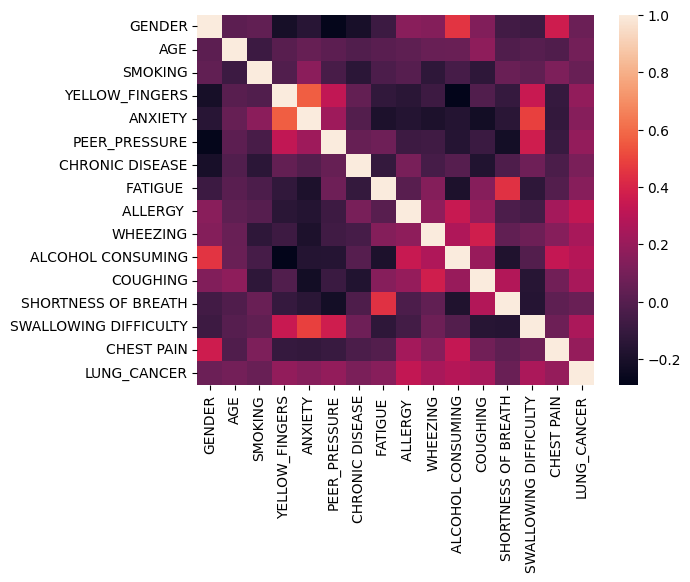

In [ ]:
sns.heatmap(lung.corr())

<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

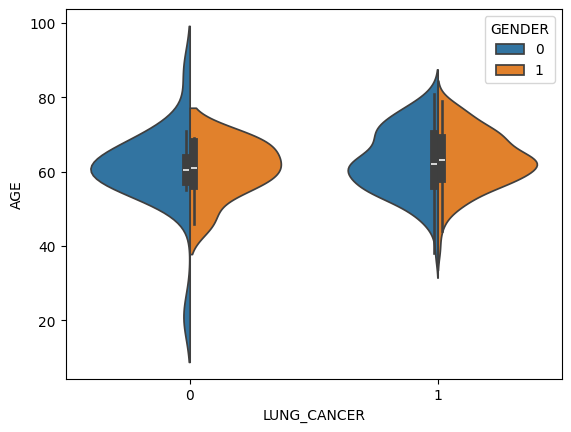

In [ ]:
sns.violinplot(x='LUNG_CANCER', y='AGE', data=lung,
               hue='GENDER', split=True)